# 安徽安庆市项目`WRF-CMAQ`模拟分析
## Model Evaluation : `chem-obs data`

---
*@author: Evan*\
*@date: 2023-05-09*

In [1]:
import sys
sys.path.append('../src/')
import ModelEvaLib as me

import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd
import shapely.geometry as sgeom
from shapely.prepared import prep
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.pyplot as plt

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

In [2]:
def polygon_to_mask(polygon, x, y):
    '''
    Generate a mask array of points falling into the polygon
    '''
    x = np.atleast_1d(x)
    y = np.atleast_1d(y)
    mask = np.zeros(x.shape, dtype=bool)

    # if each point falls into a polygon, without boundaries
    prepared = prep(polygon)
    for index in np.ndindex(x.shape):
        point = sgeom.Point(x[index], y[index])
        if prepared.contains(point):
            mask[index] = True

    return mask


In [6]:
ncfile = 'F:/Data/case_anqing/April/April_chem.nc'
shpfile = 'F:/Data/case_anqing/shapefile/Anqing/Anqing.shp'
shpurban = 'F:/Data/case_anqing/shapefile/Anqing_urban/urban.shp'
# shprural = 'F:/Data/case_anqing/shapefile//Anqing_rural/rural.shp'
xlsfile = 'F:/Data/case_anqing/April/obsdata/allsite.xlsx'
xlsurban = 'F:/Data/case_anqing/April/obsdata/urban.xlsx'
# xlsrural = 'F:/Data/case_anqing/obs_202302_fromlzj/rural.xlsx'

title = '$O_3$ + $NO_2$'
units = '$\mu$$g/$$m^3$'

## 安庆市全部

In [4]:
simfile = xr.open_dataset(ncfile)

o3 = simfile.O3[:,0,:,:]
no2 = simfile.NO2[:,0,:,:]

shp = gpd.read_file(shpfile)
for i in range(np.size(o3.latitude,0)):
    for j in range(np.size(o3.latitude,1)):
        if polygon_to_mask(shp.geometry[0],o3.longitude[i,j],o3.latitude[i,j])==False:
            o3[:,i,j] = np.nan
            no2[:,i,j] = np.nan

O3 = np.nanmean(np.nanmean(o3,1),1)
NO2 = np.nanmean(np.nanmean(no2,1),1)

In [5]:
o3 = simfile.O3[:,0,:,:]
no2 = simfile.NO2[:,0,:,:]
shp = gpd.read_file(shpurban)

for i in range(np.size(o3.latitude,0)):
    for j in range(np.size(o3.latitude,1)):
        if polygon_to_mask(shp.geometry[0],o3.longitude[i,j],o3.latitude[i,j])==False:
            o3[:,i,j] = np.nan
            no2[:,i,j] = np.nan

O3u = np.nanmean(np.nanmean(o3,1),1)
NO2u = np.nanmean(np.nanmean(no2,1),1)

In [7]:
obsfile = pd.read_excel(xlsfile)
obsurban = pd.read_excel(xlsurban)
# obsrural = pd.read_excel(xlsrural)

O3_obs = obsfile['O3']
NO2_obs = obsfile['NO2']
O3_obsu = obsurban['O3']
NO2_obsu = obsurban['NO2']
# O3_obsr = obsrural['O3']
# NO2_obsr = obsrural['NO2']

start = '2023-04-01T00'
end   = '2023-04-30T23'
df = pd.DataFrame({'obs':O3_obs.values+NO2_obs.values,'sim':O3+NO2},
                  index=pd.date_range(start,end,freq='h'))

dfu = pd.DataFrame({'obs':O3_obsu.values+NO2_obsu.values,'sim':O3u+NO2u},
                  index=pd.date_range(start,end,freq='h'))

# dfr = pd.DataFrame({'obs':O3_obsr.values+NO2_obsr.values,'sim':O3r+NO2r},
#                   index=pd.date_range(start,end,freq='h'))

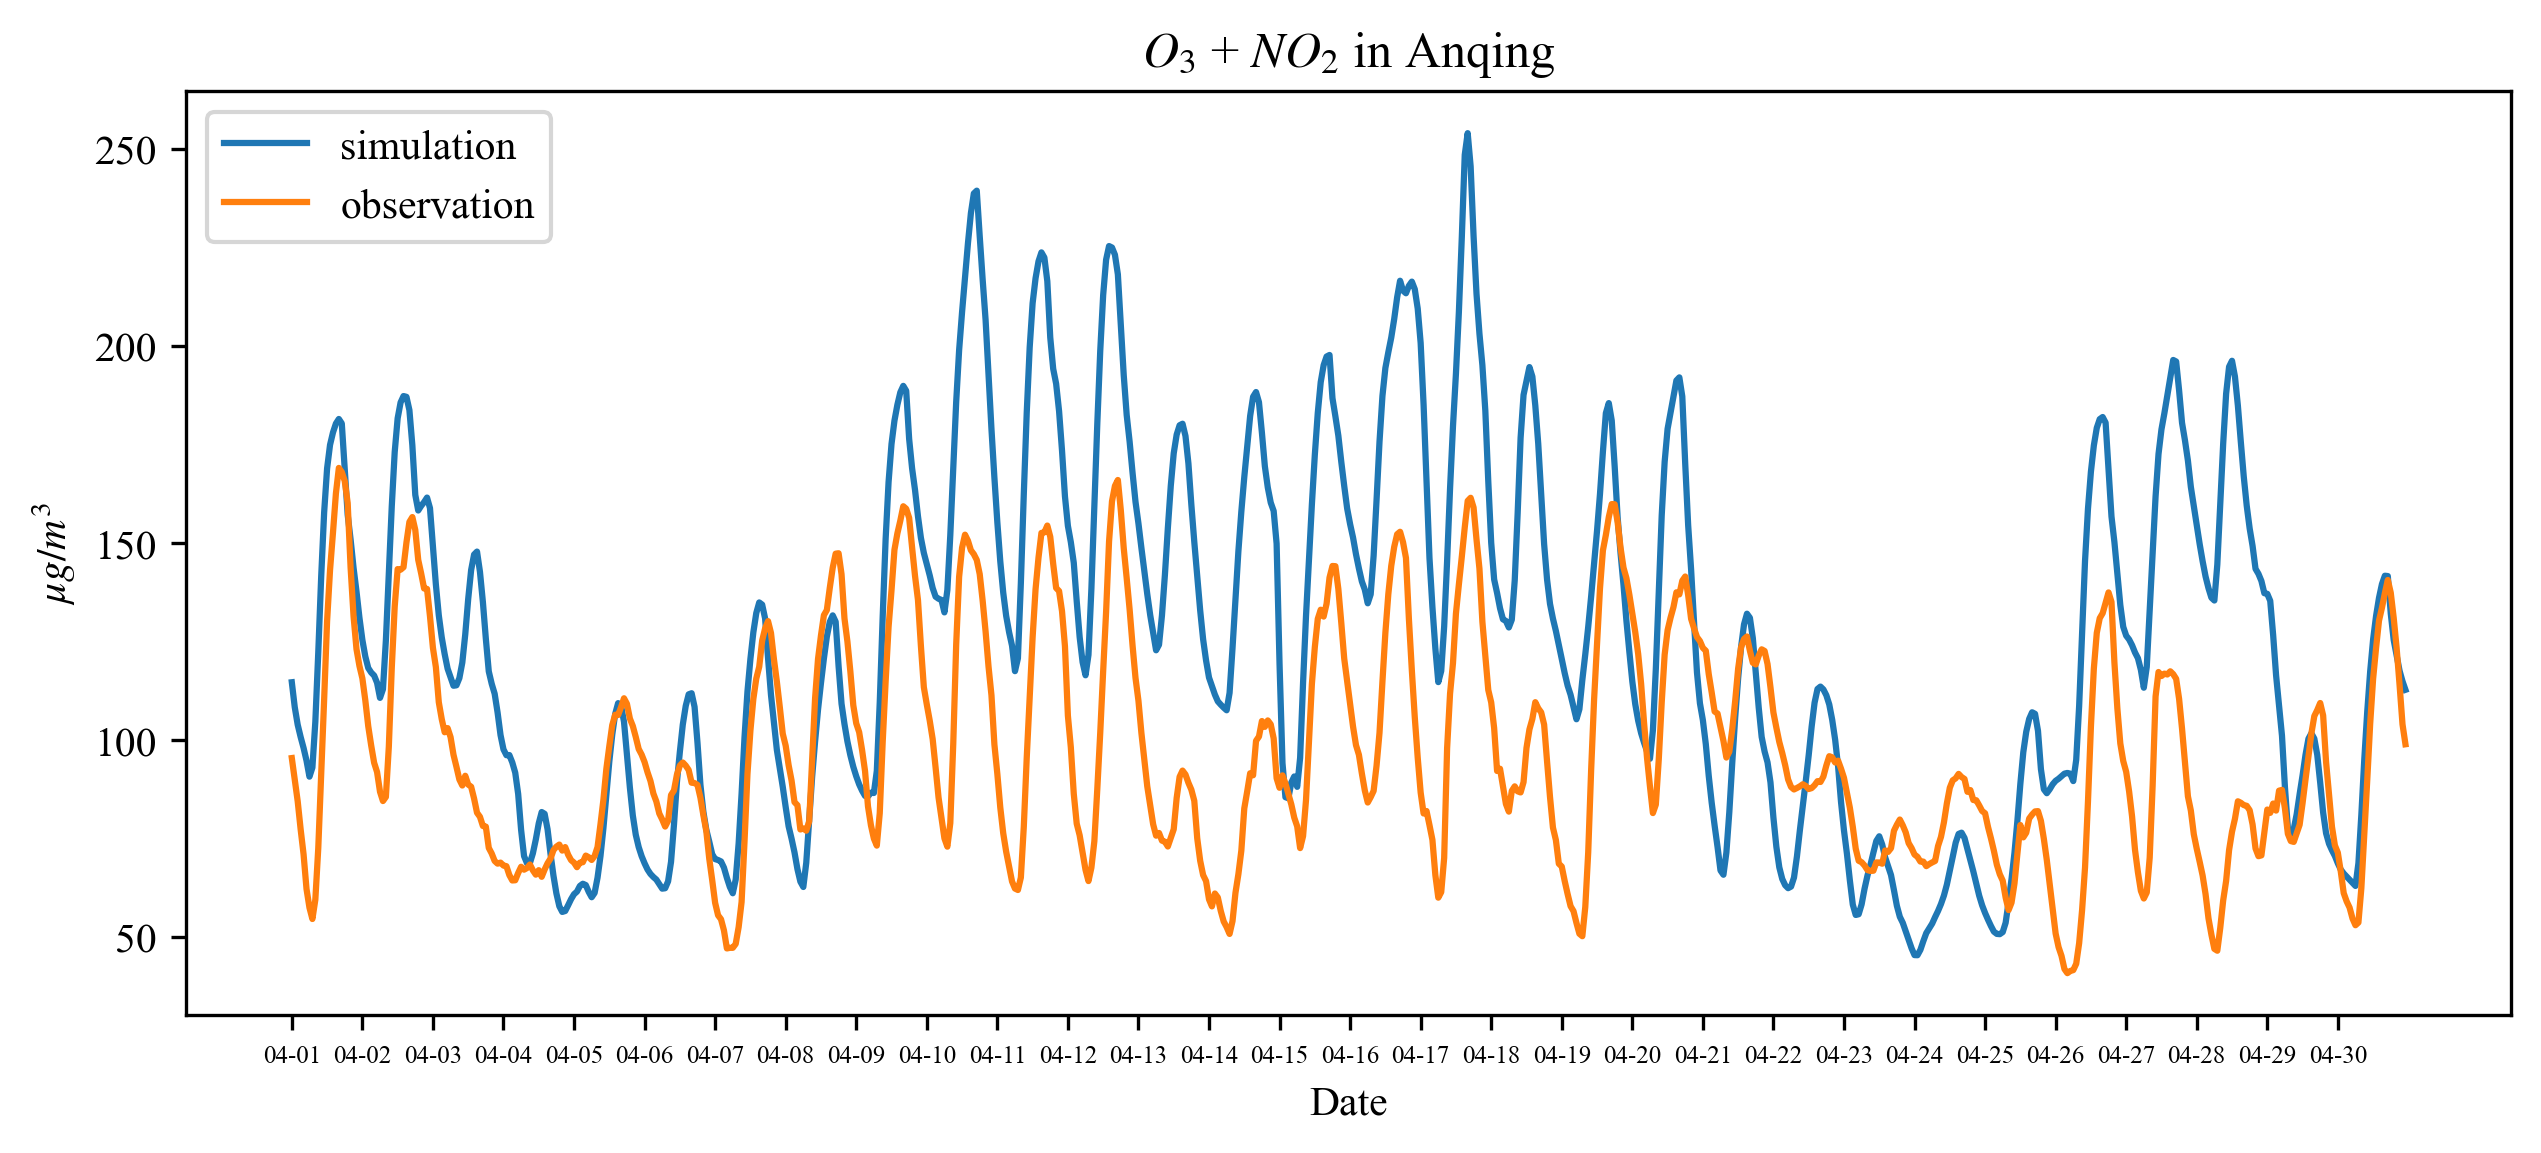

In [8]:
start = '2023-04-01T00'
end   = '2023-04-30T23'

ax = me.linechart(O3+NO2, O3_obs+NO2_obs, start, end)

ax.legend(loc=2)
ax.set_title(f'{title} in Anqing')
ax.set_xlabel('Date')
ax.set_ylabel(units)
plt.show()

In [9]:
me.evaluation_frame(O3+NO2, O3_obs+NO2_obs, df)

,param,value
0,obs mean,125.840469
1,sim mean,96.730102
2,R,0.642169
3,MB,-29.110367
4,RMSE,45.950790
5,IOA,0.678891


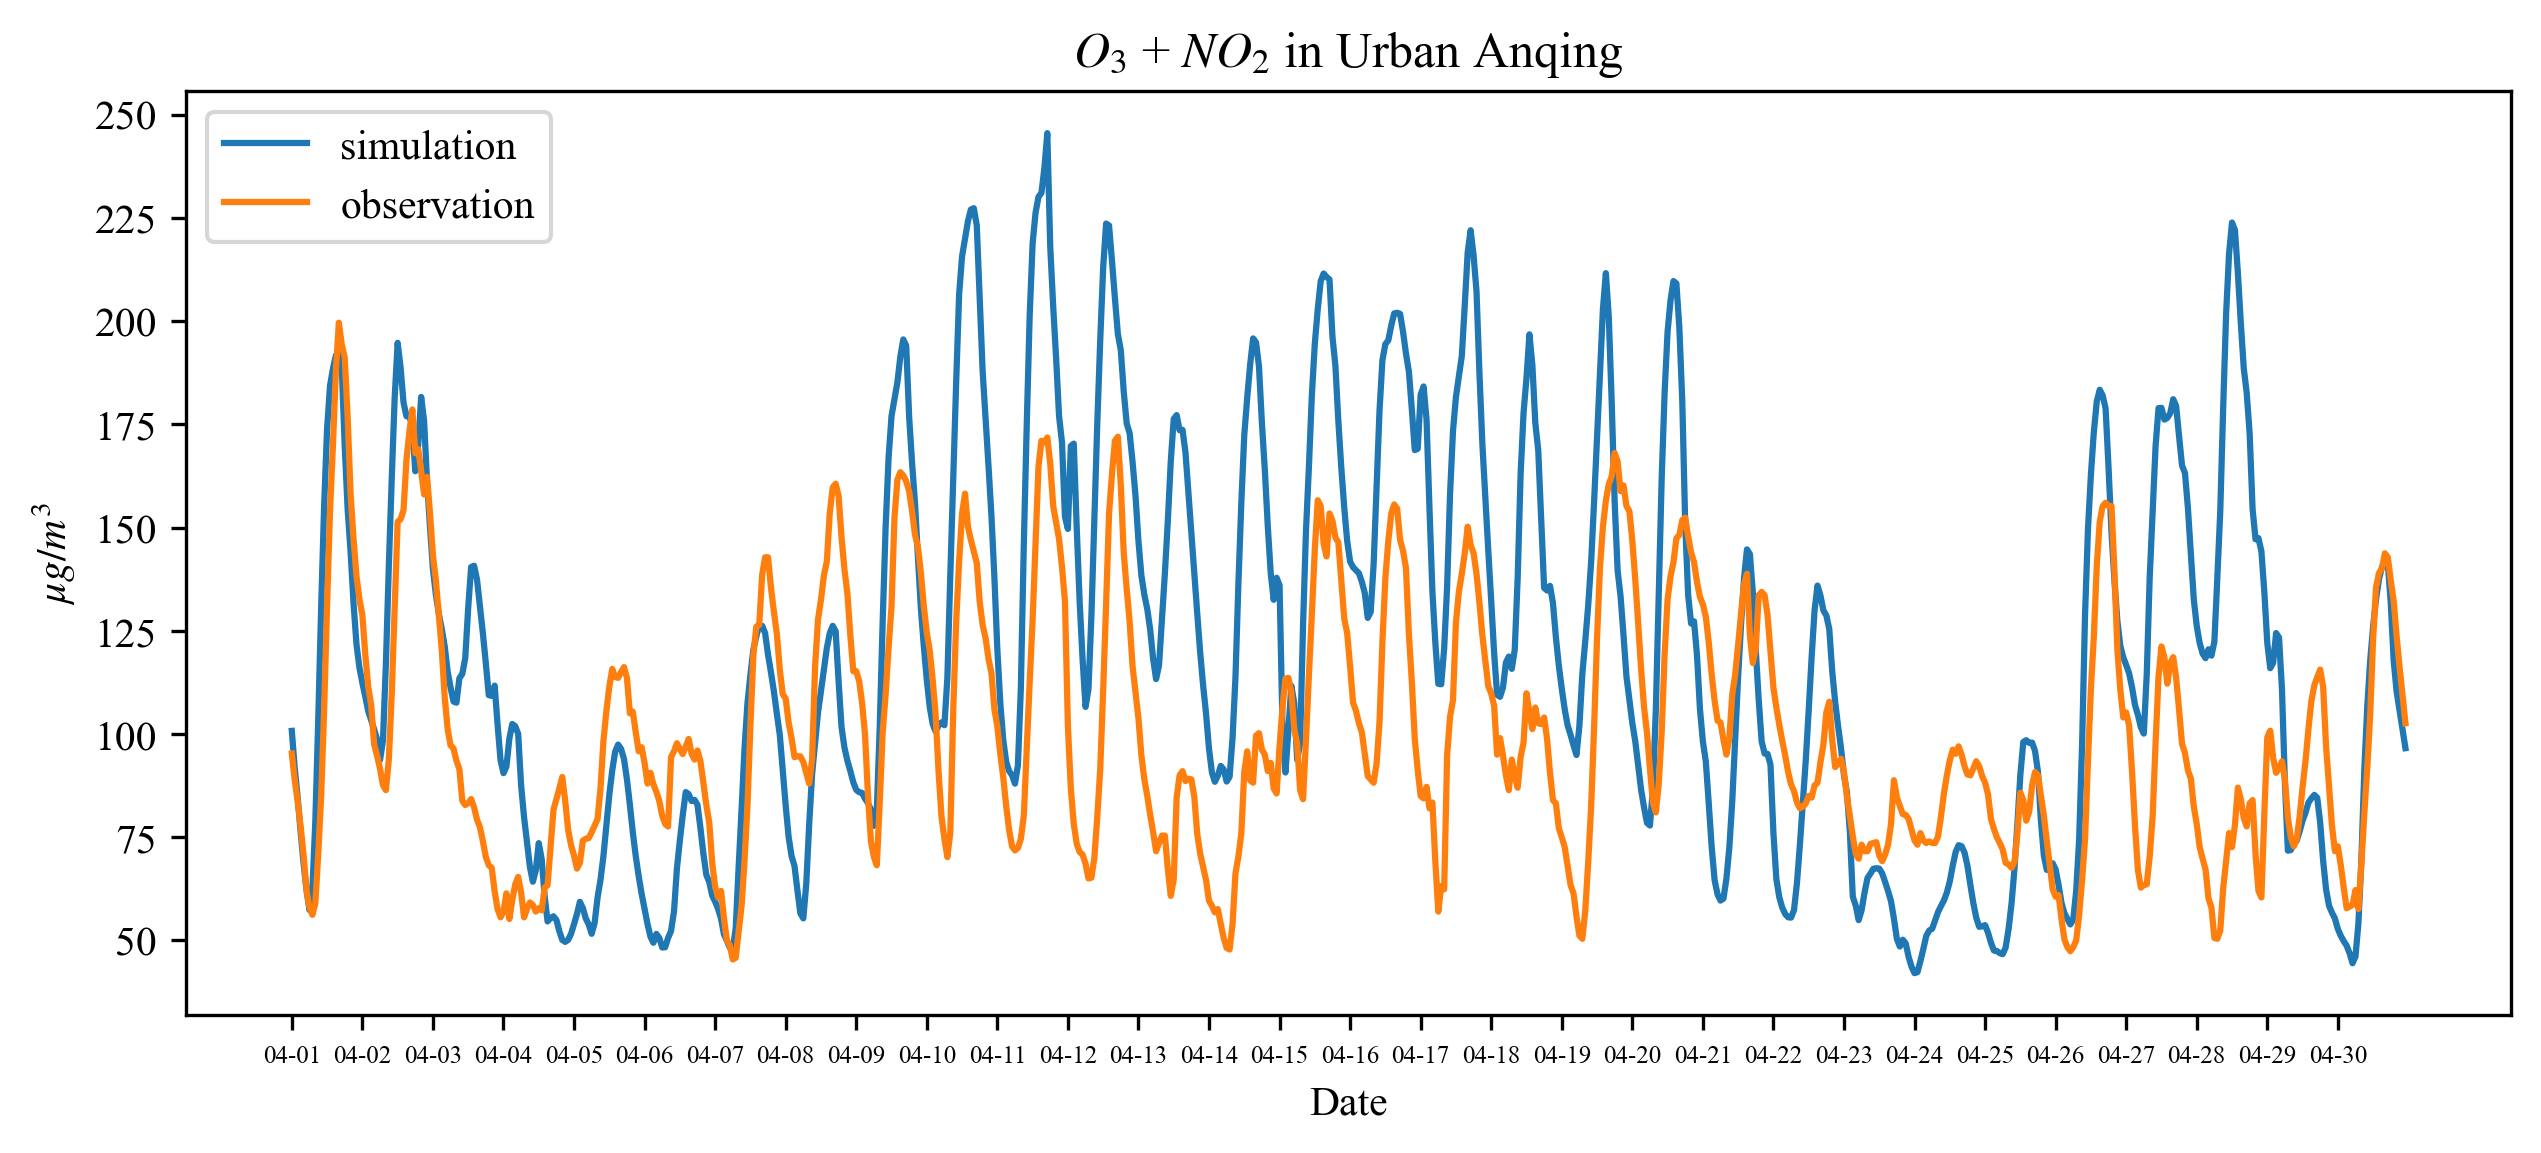

In [10]:
start = '2023-04-01T00'
end   = '2023-04-30T23'

ax = me.linechart(O3u+NO2u, O3_obsu+NO2_obsu, start, end)

ax.legend(loc=2)
ax.set_title(f'{title} in Urban Anqing')
ax.set_xlabel('Date')
ax.set_ylabel(units)
plt.show()

In [11]:
me.evaluation_frame(O3u+NO2u, O3_obsu+NO2_obsu, dfu)

,param,value
0,obs mean,119.298676
1,sim mean,100.679028
2,R,0.606306
3,MB,-18.619648
4,RMSE,43.141422
5,IOA,0.712518


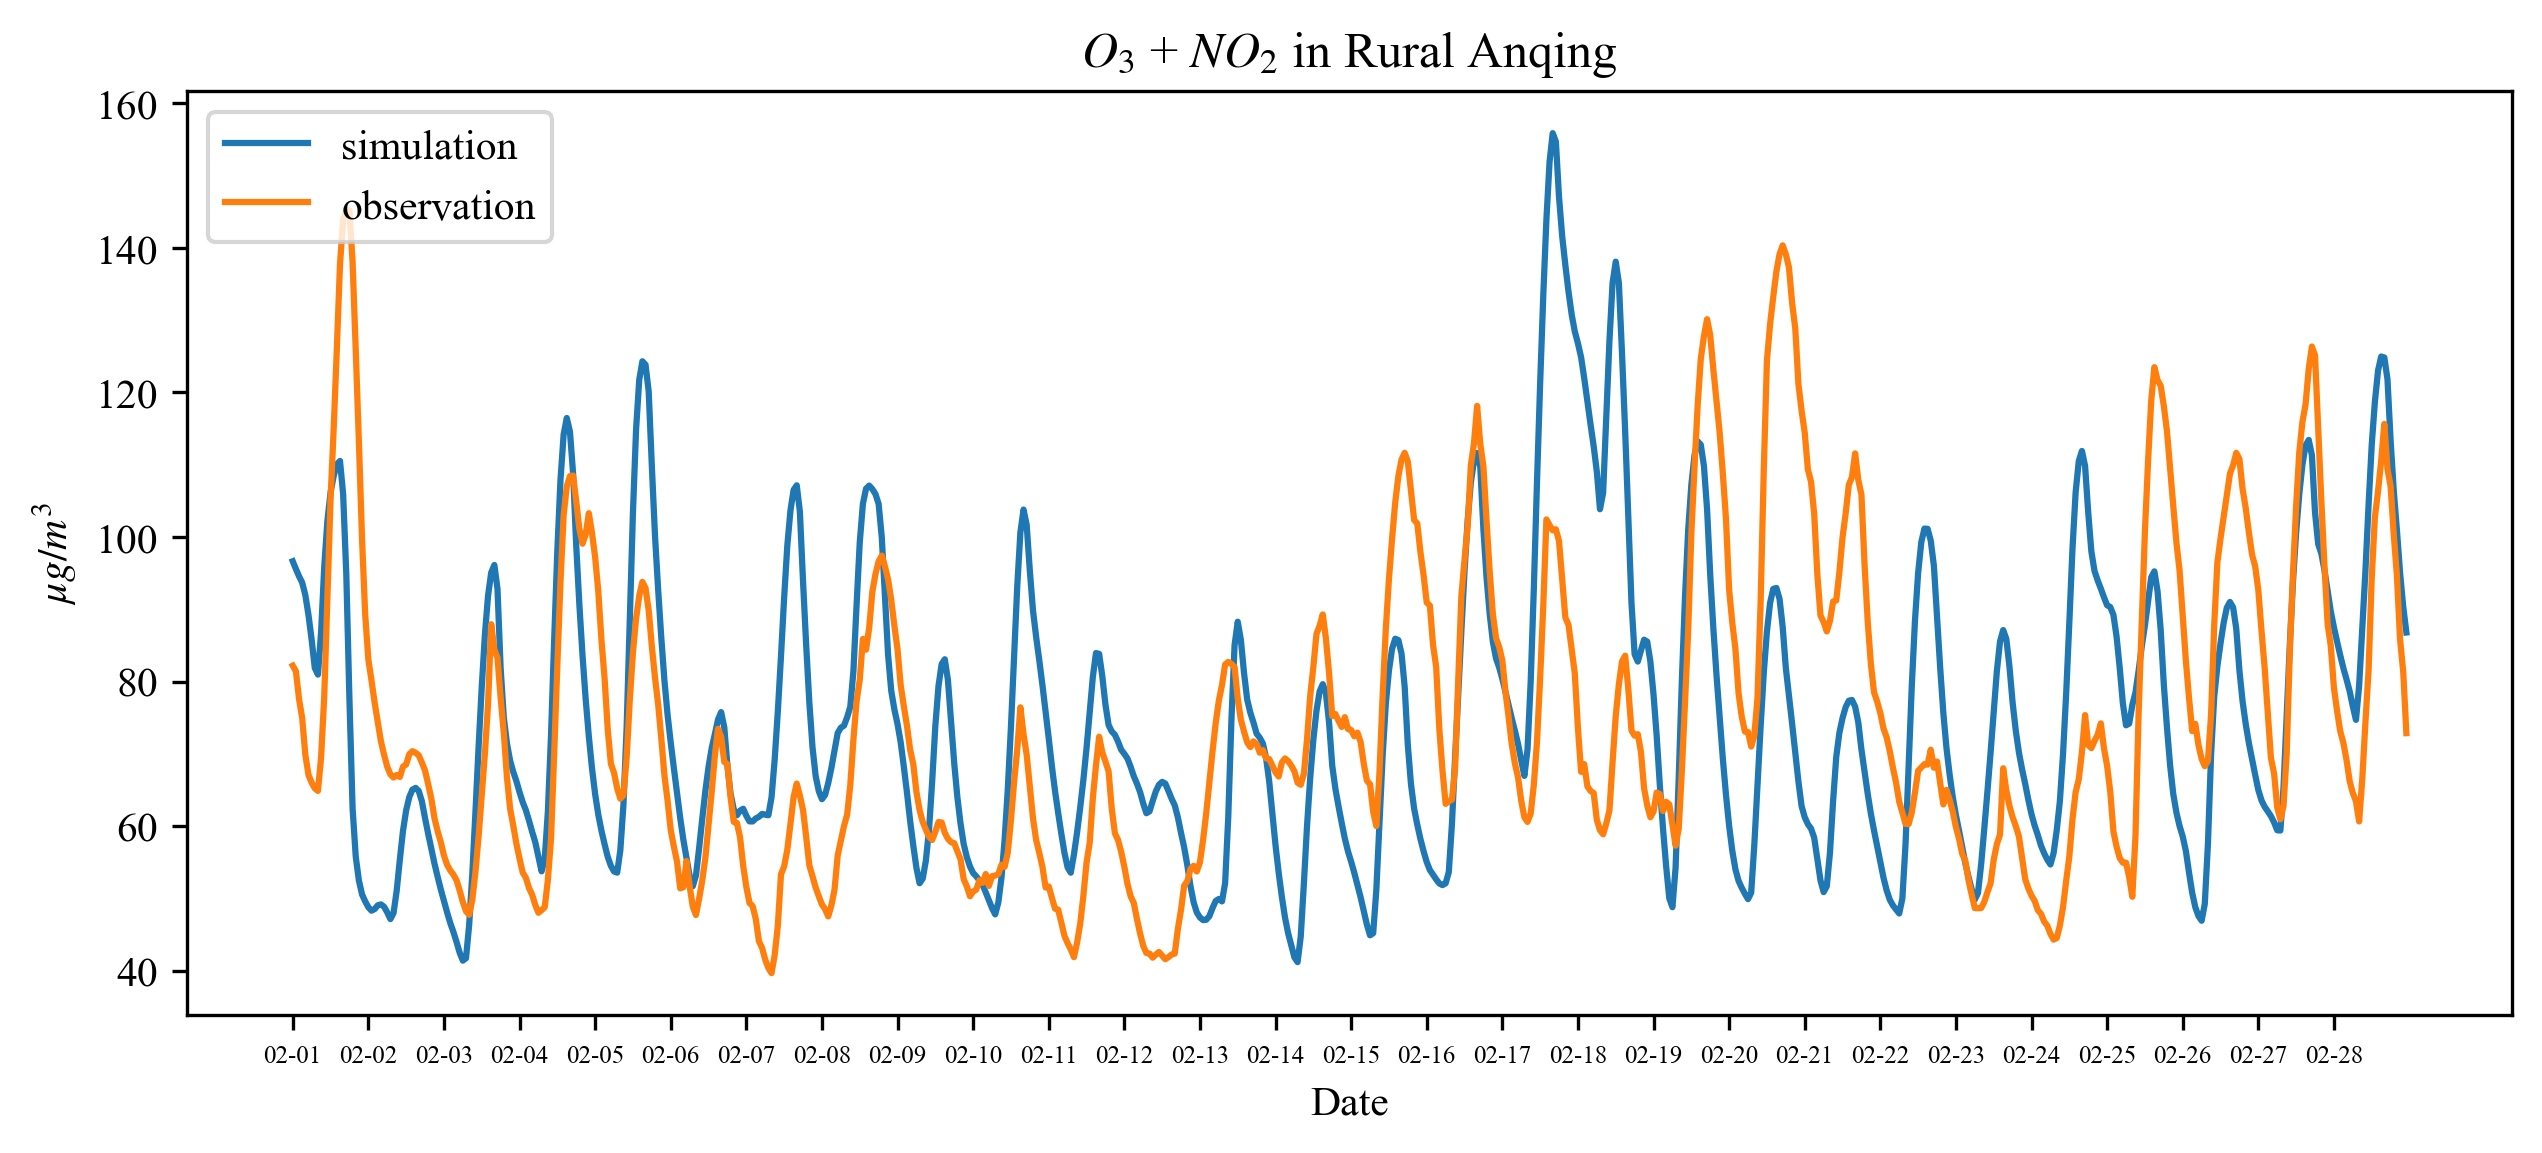

In [18]:
start = '2023-02-01T00'
end = '2023-02-28T23'

ax = me.linechart(O3r+NO2r, O3_obsr+NO2_obsr, start, end)

ax.legend(loc=2)
ax.set_title(f'{title} in Rural Anqing')
ax.set_xlabel('Date')
ax.set_ylabel(units)
plt.show()

In [19]:
me.evaluation_frame(O3r+NO2r, O3_obsr+NO2_obsr, dfr)

,param,value
0,obs mean,75.617294
1,sim mean,74.872093
2,R,0.441848
3,MB,-0.745201
4,RMSE,23.144463
5,IOA,0.663360
